# Results/plots (collaborative)

In [15]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.append("../src")

import utils.misc as u
import pandas as pd
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
EXP_NAME = "collaborative"
TARGET_NAMES = [1, 2, 3, 4, "peak", "peak_wk", "onset_wk"]
REGION_NAMES = ["nat", *[f"hhs{i}" for i in range(1, 11)]]

In [17]:
def read_scores():
    """
    Read scores and return a df
    """
    
    df = pd.DataFrame({
        "model": [],
        "score": [],
        "target": [],
        "region": []
    })
    for tname in TARGET_NAMES:
        dft = u.get_scores("../results", EXP_NAME, str(tname))
        dft["target"] = str(tname)
        df = pd.concat([df, dft], ignore_index=True)

    df = df[df["region"] != "all"]
    df["score"] = -df["score"]
    return df

In [18]:
def plot_target(select_fn, label):
    """
    Create a plot for the given selection with label
    """
    
    def _is_ensemble(tick):
        return any([tick.get_text().startswith(e) for e in ["dem", "mdn", "cnn", "product"]])

    df = read_scores()
    df = df[df["target"].map(select_fn)]
    df = df.groupby(by=["model", "region"]).mean().reset_index()

    fig, ax = plt.subplots(figsize=(12, 8))
    
    sorted_df = df.groupby(by=["model"]).mean().reset_index().sort_values("score")
    for region in REGION_NAMES:
        sub = df[df["region"] == region].merge(sorted_df, on="model", suffixes=("", "_mean"))
        sub = sub.sort_values("score_mean").reset_index()
        ax.scatter(x=range(sub.shape[0]), y=sub["score"], alpha=0.8, label=region)
    ax.scatter(x=range(sorted_df.shape[0]), y=sorted_df["score"],
               s=90, c="#333333", marker="x", label="mean score")
    ax.set_xticks(range(sorted_df.shape[0]))
    ax.set_xticklabels(sorted_df["model"])
    ax.set_ylabel("Log score")
    ax.set_title(label)
    ax.legend(ncol=3)
    ax.set_axisbelow(True)
    ax.grid(True, axis="both", color="#dddddd")
    [t.set_color("#333333") for t in ax.get_xticklabels() if not _is_ensemble(t)]
    [t.set_weight("bold") for t in ax.get_xticklabels() if _is_ensemble(t)]

    plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
    plt.tight_layout(pad=3)
    plt.savefig(f"../plots/{EXP_NAME}/{label.lower().strip().replace(' ', '-')}.pdf")
    plt.show()

## All targets combined

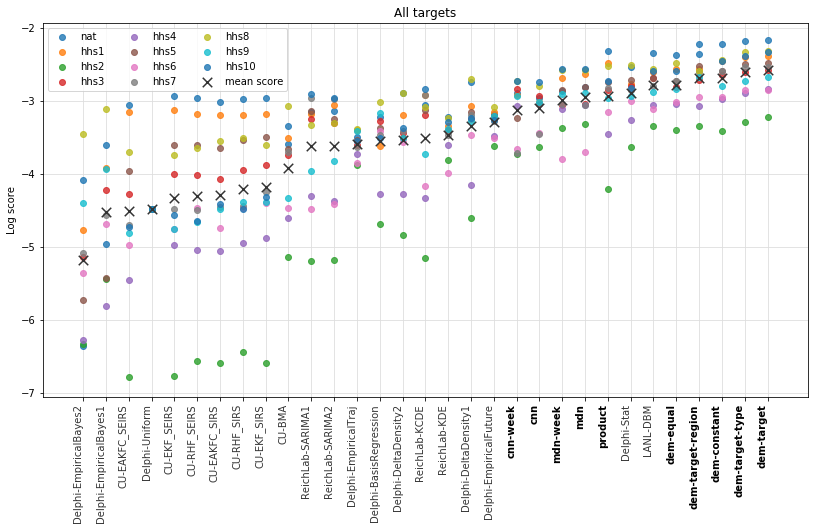

In [19]:
plot_target(lambda x: True, "All targets")

## All weekly targets

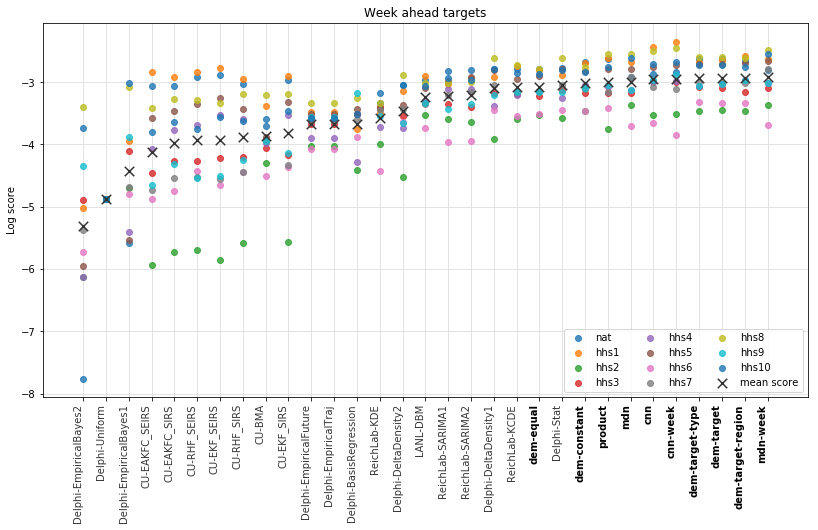

In [20]:
plot_target(lambda x: x in ["1", "2", "3", "4"], "Week ahead targets")

## All seasonal targets

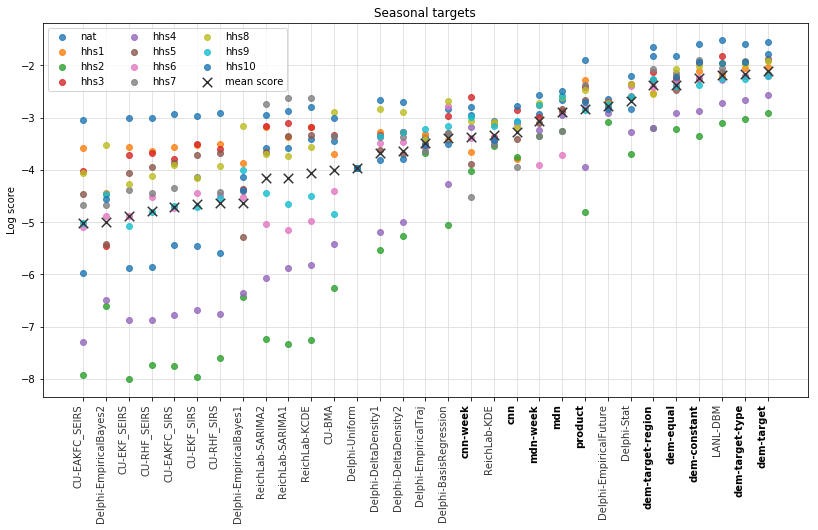

In [21]:
plot_target(lambda x: x in ["peak", "peak_wk", "onset_wk"], "Seasonal targets")

## 1 week ahead

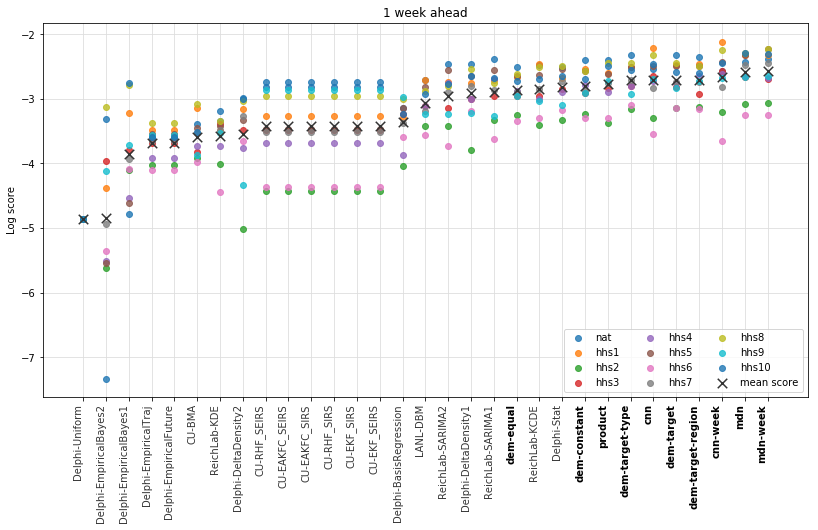

In [22]:
plot_target(lambda x: x == "1", "1 week ahead")

## 2 weeks ahead

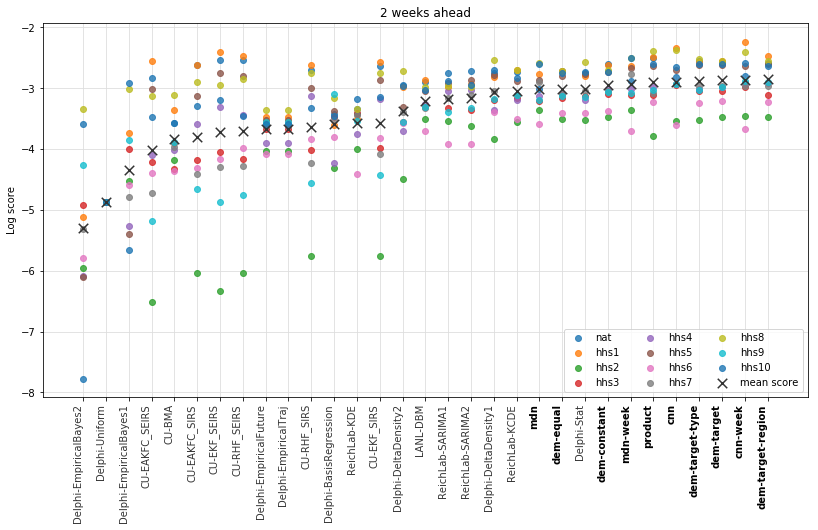

In [23]:
plot_target(lambda x: x == "2", "2 weeks ahead")

## 3 weeks ahead

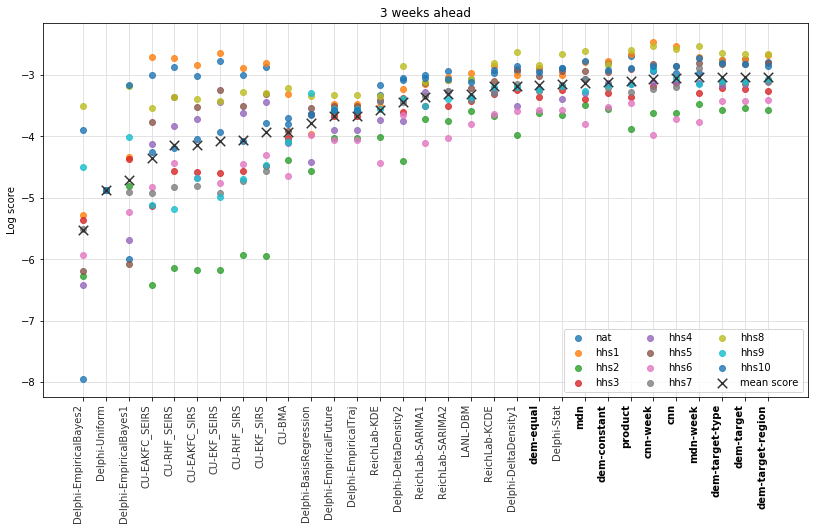

In [24]:
plot_target(lambda x: x == "3", "3 weeks ahead")

## 4 weeks ahead

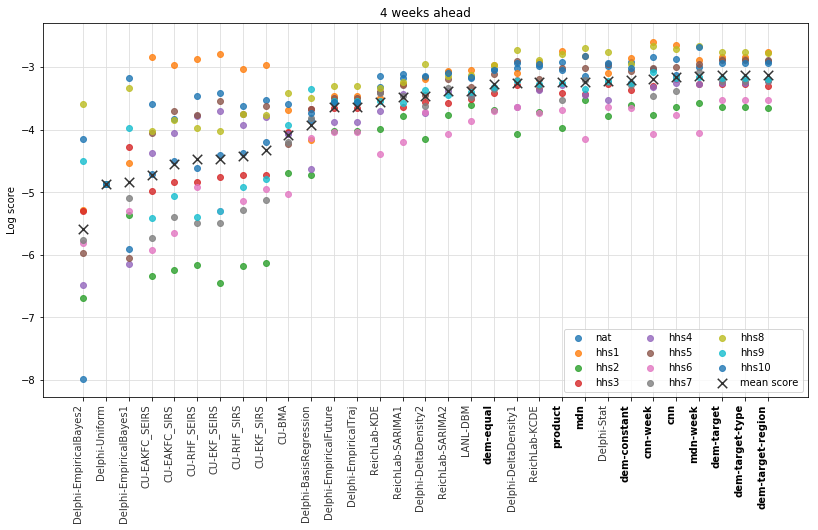

In [25]:
plot_target(lambda x: x == "4", "4 weeks ahead")

## Peak wili

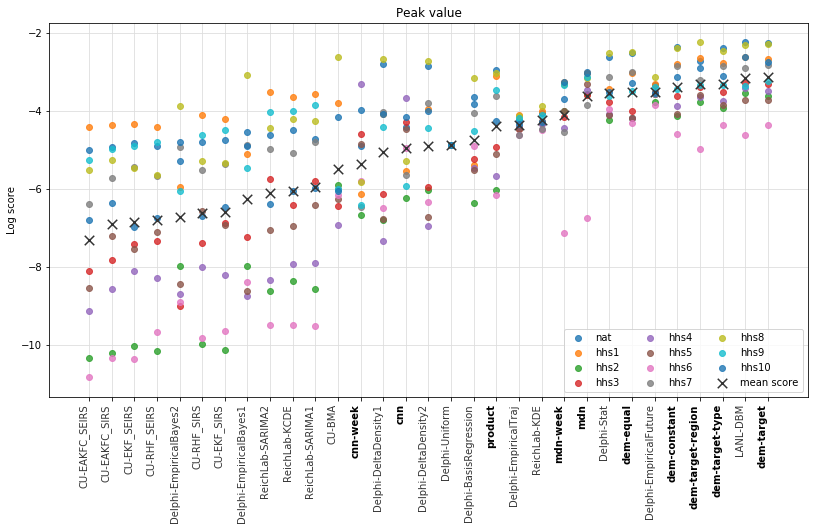

In [26]:
plot_target(lambda x: x == "peak", "Peak value")

## Peak week

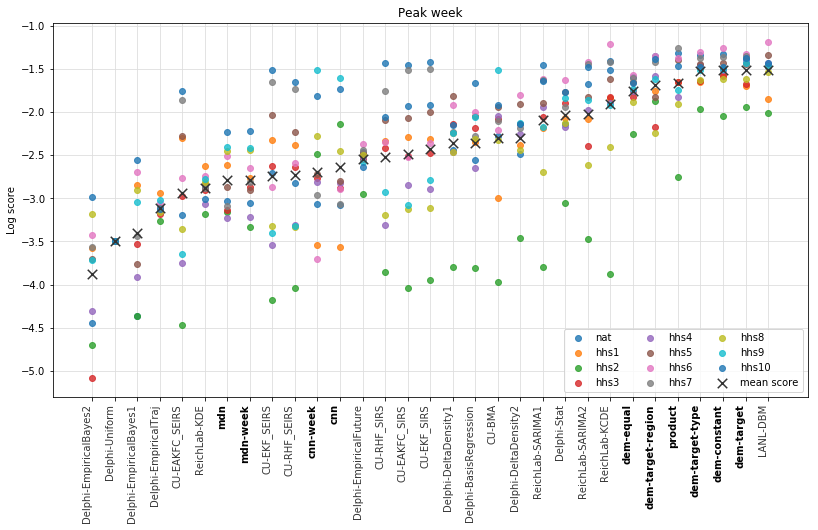

In [27]:
plot_target(lambda x: x == "peak_wk", "Peak week")

## Onset week

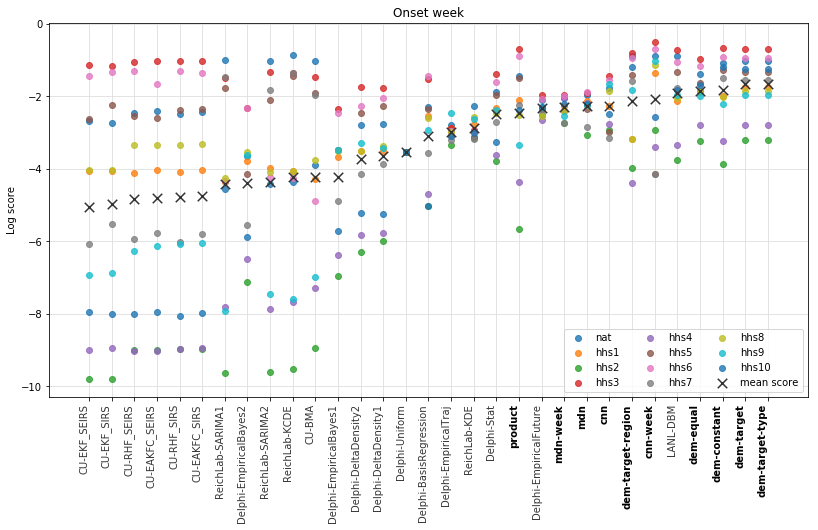

In [28]:
plot_target(lambda x: x == "onset_wk", "Onset week")